In [ ]:
%pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = cv2.imread('img1.jpg')
cropImg = img[300:2000, 750:2600]

cv2_imshow(img)
cv2_imshow(cropImg)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
img = cv2.imread('img2.jpg')
cropImg = img[550:2250, 550:2450]

cv2_imshow(img)
cv2_imshow(cropImg)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from scipy import ndimage, misc

In [ ]:
img=cv2.imread('hasil-crop-1.png')

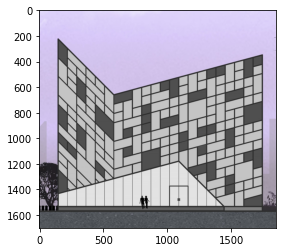

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
from skimage import io
from skimage import transform as tf

In [ ]:

def zoom_at(img, zoom=1, angle=0, coord=None):
    
    cy, cx = [ i/2 for i in img.shape[:-1] ] if coord is None else coord[::-1]
    
    rot_mat = cv2.getRotationMatrix2D((cx,cy), angle, zoom)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    return result

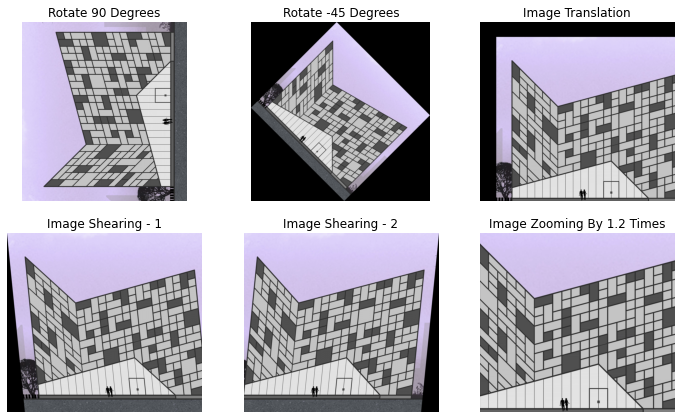

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots(2, 3)
fig.tight_layout()
img_90 = ndimage.rotate(img, 90)
img_min_45 = ndimage.rotate(img, -45)
height, width = img.shape[:2]
new_height, new_width = height / 12, width / 12
T = np.float32([[1, 0, new_width], [0, 1, new_height]])
img_translation = cv2.warpAffine(img, T, (width, height))
# Create Afine transform
afine_tf = tf.AffineTransform(shear=0.1)

# Apply transform to image data
modified = tf.warp(img, inverse_map=afine_tf)
# Create Afine transform
afine_tf1 = tf.AffineTransform(shear=-0.1)

# Apply transform to image data
modified2 = tf.warp(img, inverse_map=afine_tf1)

zoom = zoom_at(img, 1.2)
ax[0,0].imshow(img_90)
ax[0,0].set_axis_off()
ax[0,0].set_title("Rotate 90 Degrees")
ax[0,1].imshow(img_min_45)
ax[0,1].set_axis_off()
ax[0,1].set_title("Rotate -45 Degrees")
ax[0,2].imshow(img_translation)
ax[0,2].set_axis_off()
ax[0,2].set_title("Image Translation")
ax[1,0].imshow(modified)
ax[1,0].set_axis_off()
ax[1,0].set_title("Image Shearing - 1")
ax[1,1].imshow(modified2)
ax[1,1].set_axis_off()
ax[1,1].set_title("Image Shearing - 2")
ax[1,2].imshow(zoom)
ax[1,2].set_axis_off()
ax[1,2].set_title("Image Zooming By 1.2 Times")
plt.show()

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [7]:
inputs = keras.Input(shape=(256, 256, 3), name="input_1")
sequential = keras.Sequential(name="sequential")(inputs)
rescalling = layers.Rescaling(1./255)(sequential)

x = layers.Conv2D(32, (3, 3), strides=(2,2), padding='same')(rescalling)
x = layers.MaxPooling2D(2)(x)
x = layers.BatchNormalization()(x)
block_1_output = layers.Activation('relu')(x)

x = layers.Conv2D(64, (3, 3), strides=(1,1), padding='same')(block_1_output)
x = layers.BatchNormalization()(x)
block_2_output = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, (3, 3), strides=(2,2), padding='same')(block_2_output)
block_3_output = x

x = layers.Activation('relu')(block_2_output)
x = layers.SeparableConv2D(128, (3, 3), strides=(1,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
block_4_output = layers.add([x, block_3_output])

x = layers.Conv2D(256, (3, 3), strides=(2,2), padding='same')(block_4_output)
block_5_output = x

x = layers.Activation('relu')(block_4_output)
x = layers.SeparableConv2D(256, (3, 3), strides=(1,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
block_6_output = layers.add([x, block_5_output])

x = layers.Conv2D(384, (3, 3), strides=(2,2), padding='same')(block_6_output)
block_7_output = x

x = layers.Activation('relu')(block_6_output)
x = layers.SeparableConv2D(384, (3, 3), strides=(1,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)
block_8_output = layers.add([x, block_7_output])

x = layers.Conv2D(512, (3, 3), strides=(1,1), padding='same')(block_8_output)
block_9_output = x

x = layers.Activation('relu')(block_8_output)
x = layers.SeparableConv2D(512, (3, 3), strides=(1,1), padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(1)(x)
block_10_output = layers.add([x, block_9_output])

x = layers.SeparableConv2D(768, (3, 3), strides=(1,1), padding='same')(block_10_output)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(7, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs, name="Dhifaf_net")
model.summary()

Model: "Dhifaf_net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        multiple             0           ['input_1[0][0]']                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 256, 256, 3)  0           ['sequential[0][0]']             
                                                                                                  
 conv2d_14 (Conv2D)             (None, 128, 128, 32  896         ['rescaling_2[0][0]']   

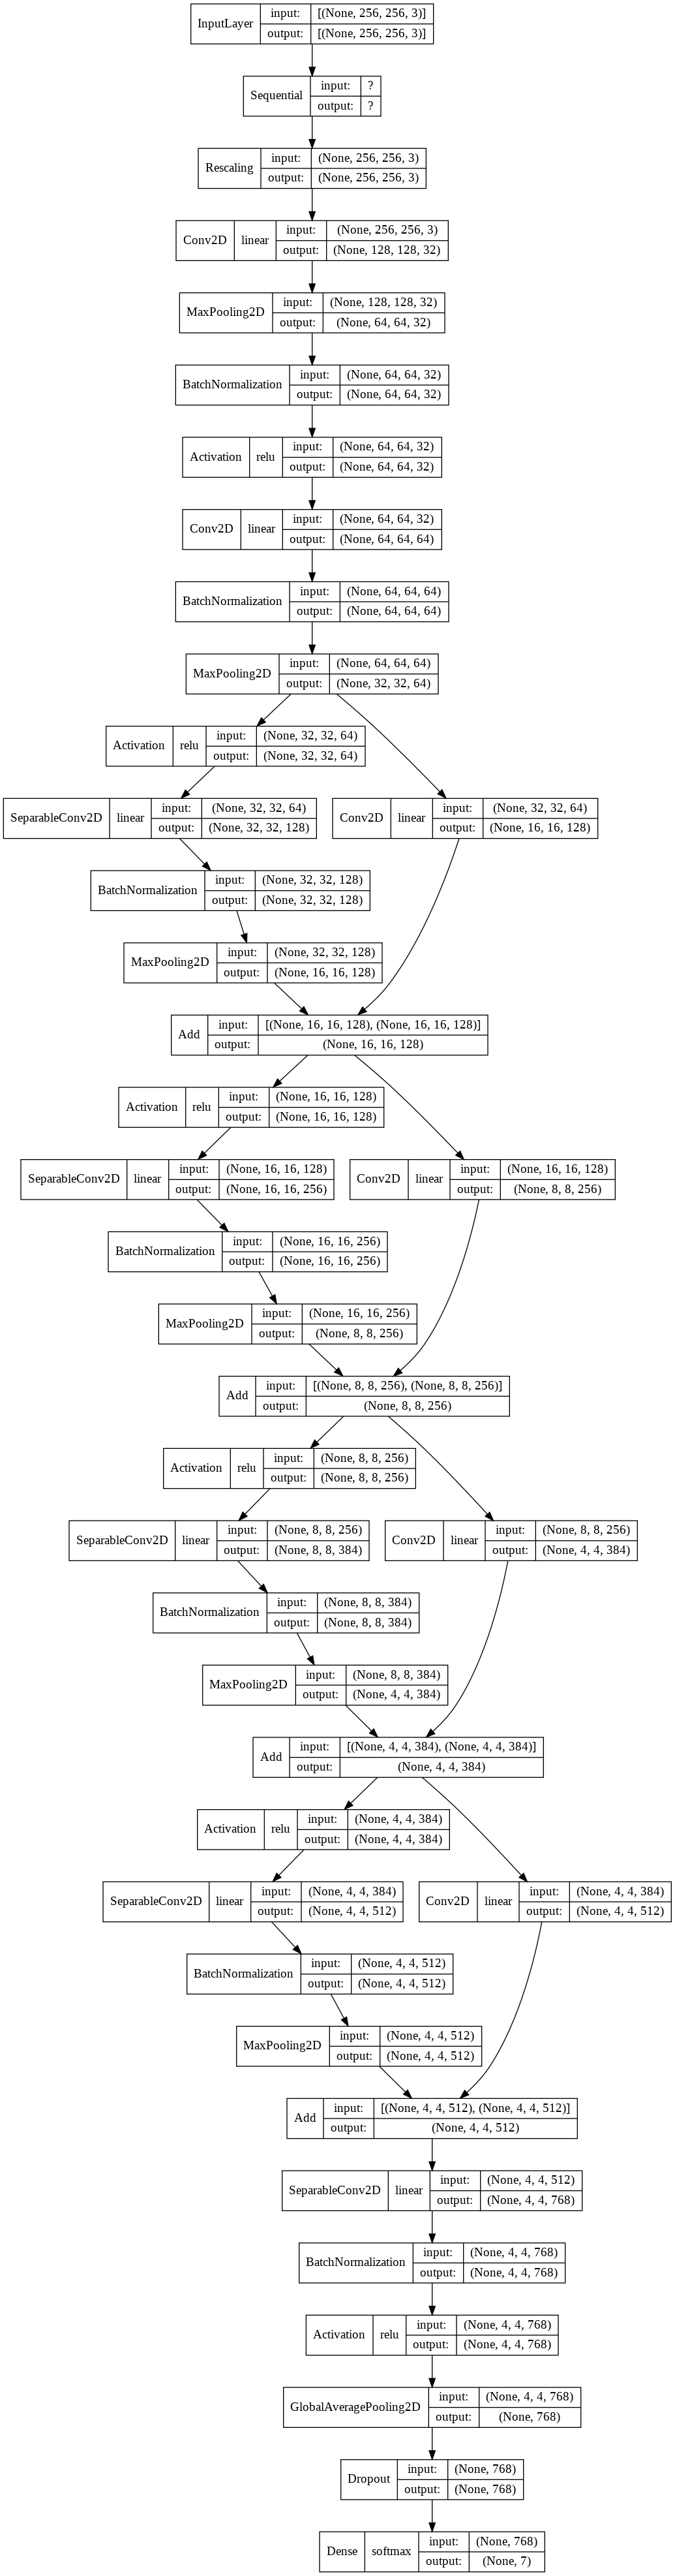

In [5]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(2,2), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))



model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0